# <font color=#247BA0 ><center><u> Data Science Project [IT-1654]</u></center></font>

## <font color=#404E5C><u>Banknotes Authentication Using Random Forest Classification<font></u>

<p style="text-align:left">by <b>Varun Gupta and Shashank Pandey</b></p> 

### <font color=#F15025><b><u>Classification in Machine Learning</u></b></font>

Classification is a process of categorizing a given set of data into classes, It can be performed on both structured or unstructured data. The process starts with predicting the class of given data points. The classes are often referred to as target, label or categories.

The classification predictive modeling is the task of approximating the mapping function from input variables to discrete output variables. The main goal is to identify which class/category the new data will fall into.

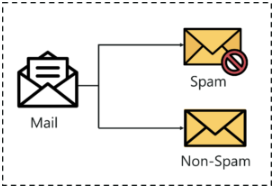

<u><font><b>There are several types of classifiers</b></font></u>:

<ul>
    <li>Linear Classifiers: Logistic Regression, Naive Bayes Classifier.</li>
    <li>Nearest Neighbor.</li>
    <li>Support Vector Machines.</li>
    <li>Decision Trees.</li>
    <li>Boosted Trees.</li>
    <li>Random Forest.</li>
    </ul>
    


<u><b>Decision Tree Classifier:</b></u>

A Decision Tree Classifier breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy). Leaf node (e.g., Play) represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

<u>The basic idea behind any decision tree algorithm is as follows:</u>
<ol>
    <li>Select the best attribute using Attribute Selection Measures(ASM) to split the records.</li>
    <li>Make that attribute a decision node and breaks the dataset into smaller subsets.</li>
    <li>Starts tree building by repeating this process recursively for each child until one of the condition will match:</li>
<ol ><li>All the tuples belong to the same attribute value.</li>
<li>There are no more remaining attributes.</li>
<li>There are no more instances.</li></ol>
</ol>

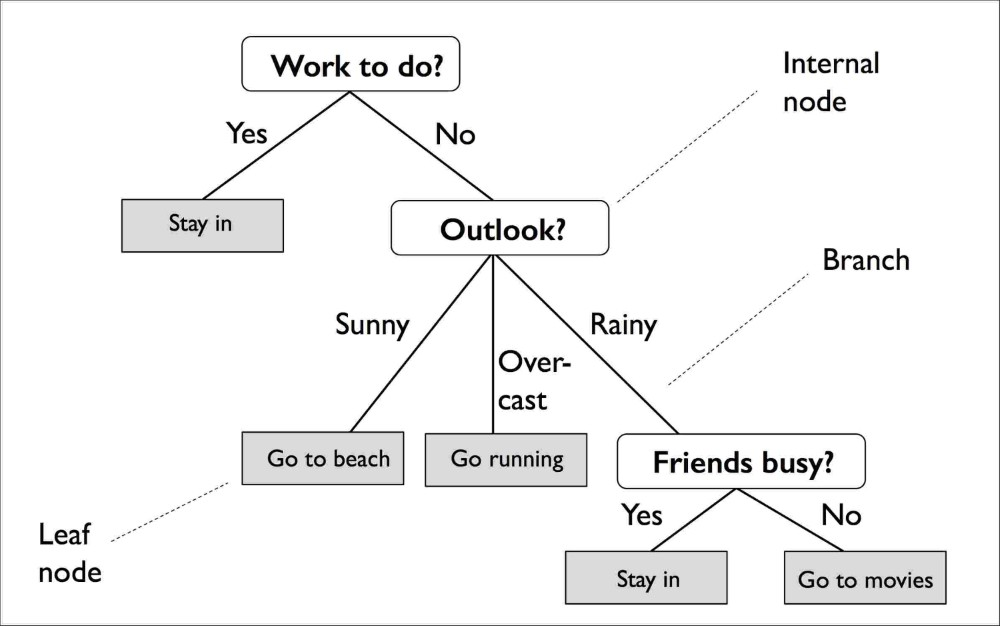

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). ID3 algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.

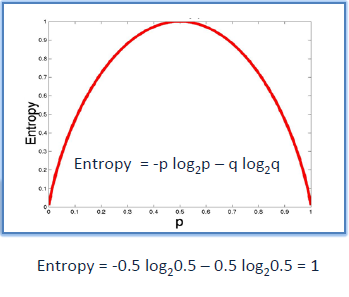

<u><b> Random Forest Classifier</b></u>

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

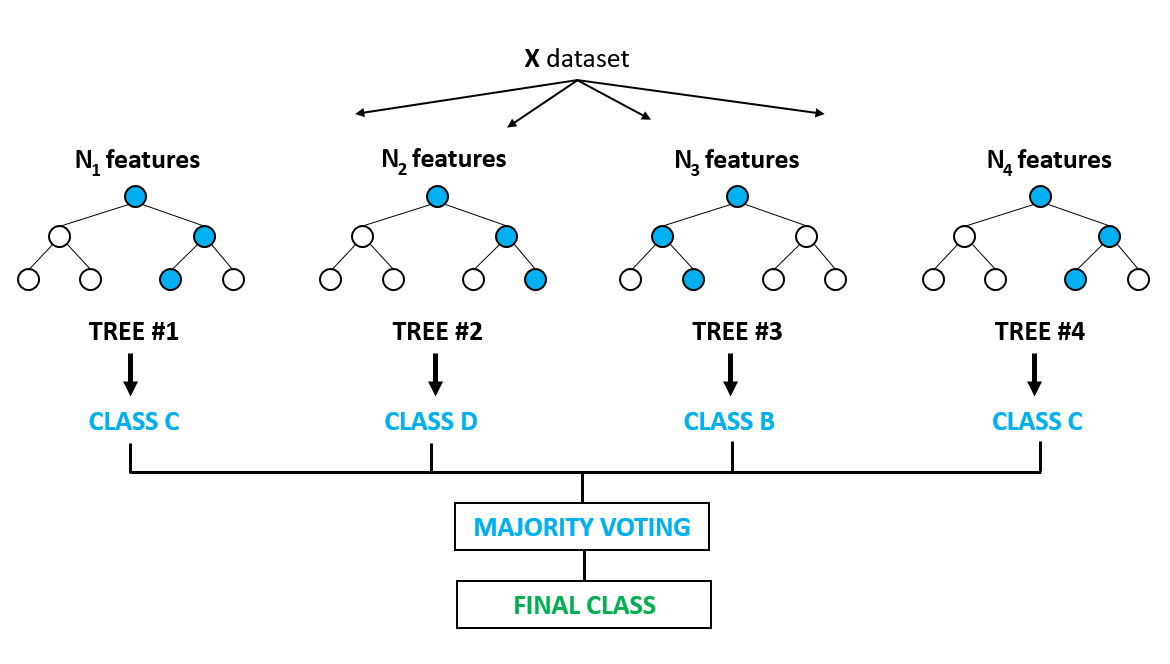

<u><b>Features and Advantages of Random Forest :</b></u>

<ul><li>It is one of the most accurate learning algorithms available. For many data sets, it produces a highly accurate classifier.</li>
<li>It runs efficiently on large databases.</li>
<li>It can handle thousands of input variables without variable deletion.</li>
<li>It gives estimates of what variables that are important in the classification.</li>
<li>It generates an internal unbiased estimate of the generalization error as the forest building progresses.</li>
<li>It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.</li>
</ul>

<u><b>Disadvantages of Random Forest:</b></u>

<ul><li>Random forests have been observed to overfit for some datasets with noisy classification/regression tasks.</li>
<li>For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels. Therefore, the variable importance scores from random forest are not reliable for this type of data.</li></ul>

### <font color=#F15025><b><u>Implementation of Random Forest Classification</u></b></font>

Following clasifier has been implemented using Python and its libraries.

<b>Importing the Required Libraries</b>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import scikitplot as skplt
from math import sqrt
import pydot

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


<b>Importing the Data Set (Sourced from kaggle)</b>

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Dataset can be used for Binary Classification sample problems

In [2]:
dataset=pd.read_csv("BNA.csv")

In [3]:
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
dataset.describe

<bound method NDFrame.describe of       variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

Hence, the following data set contains 1372 rows and 5 columns containing - Variance, skewness, cutosis, entopy and class values

<ul><li>variance:variance of Wavelet Transformed image (continuous)</li><br><br>
<li>skewness:skewness of Wavelet Transformed image (continuous)</li>
<li>curtosis:curtosis of Wavelet Transformed image (continuous)</li>
<li>entropy:entropy of image (continuous)</li>
<li>class:class (integer)</li>
</ul>

<b>Data Cleaning and Pre-Processing</b>

In [6]:
print(dataset[dataset['variance']==np.nan]) 
print(dataset[dataset['skewness']==np.nan]) 
print(dataset[dataset['curtosis']==np.nan]) 
print(dataset[dataset['entropy']==np.nan]) 
print(dataset[dataset['class']==np.nan])

Empty DataFrame
Columns: [variance, skewness, curtosis, entropy, class]
Index: []
Empty DataFrame
Columns: [variance, skewness, curtosis, entropy, class]
Index: []
Empty DataFrame
Columns: [variance, skewness, curtosis, entropy, class]
Index: []
Empty DataFrame
Columns: [variance, skewness, curtosis, entropy, class]
Index: []
Empty DataFrame
Columns: [variance, skewness, curtosis, entropy, class]
Index: []


No nan or missing values in the data set...

To conduct analysis of out classification model, it is essential to split the given data. One to train the model, and the other to test it.

#### Feature Selection for Our Model

In [7]:
X=dataset.iloc[:,[0,1,2,3]].values
y=dataset.iloc[:,4].values
feats=X
labs=y

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

<b>Exploratory Data Analysis</b>

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

Text(0.5, 1.0, 'Binary Classified values')

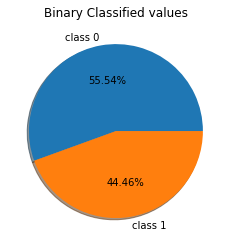

In [8]:
labels=['class 0','class 1']

sizes=[dataset['class'].value_counts()[0],dataset['class'].value_counts()[1]]

plot1 = plt.pie(sizes,labels=labels,shadow=True,autopct='%1.2f%%')
plt.title("Binary Classified values")

Hence, We have got equally classifies data of both types.

<u>Pairplots</u>

While there are an almost overwhelming number of methods to use in EDA, one of the most effective starting tools is the pairs plot (also called a scatterplot matrix). A pairs plot allows us to see both distribution of single variables and relationships between two variables.

Text(0.5, 0.98, 'Pairplot')

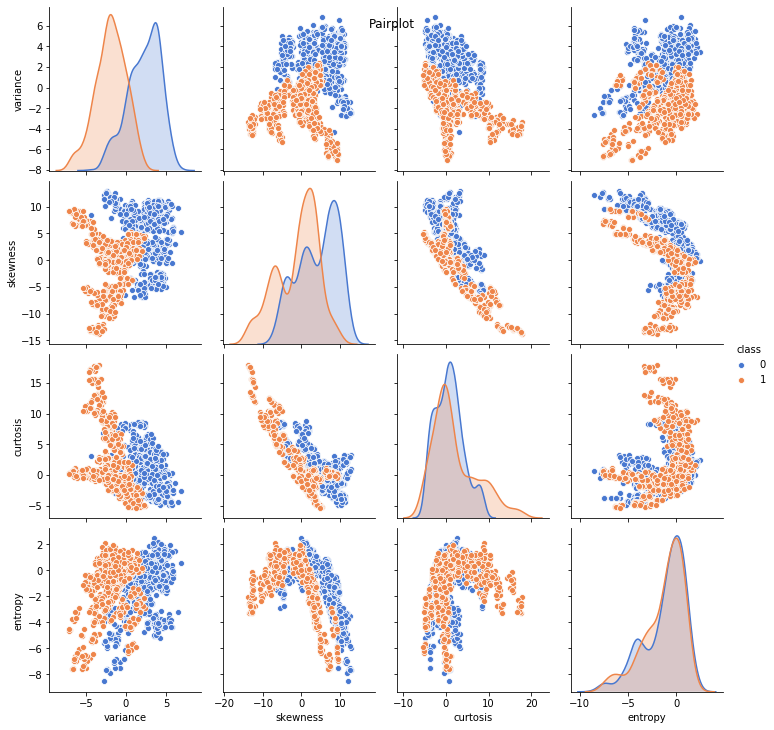

In [9]:
plot2=sns.pairplot(dataset,hue='class',palette = "muted")
plot2.fig.suptitle("Pairplot")

<u>BoxPlots</u>

Way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines either side of the rectangle.

Text(0.5, 1.0, 'Variance values box plot')

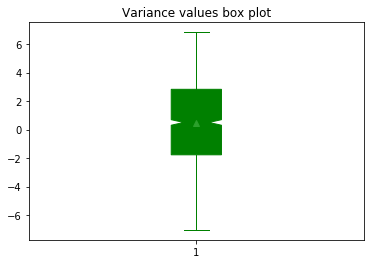

In [10]:
c = "green"
plot3=plt.boxplot(X[:,[0]],showmeans=True, notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
plt.title("Variance values box plot")

Text(0.5, 1.0, 'skewness values box plot')

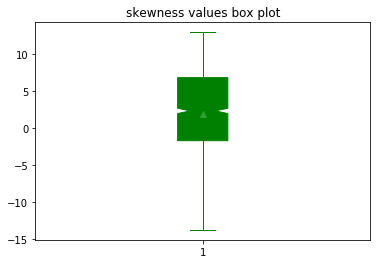

In [11]:
plot3=plt.boxplot(X[:,[1]],showmeans=True, notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
plt.title("skewness values box plot")

Text(0.5, 1.0, 'curtosis values box plot')

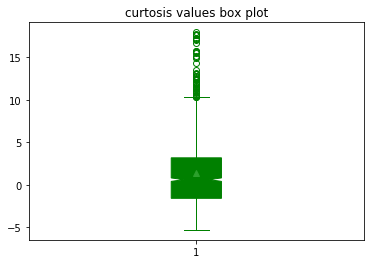

In [12]:
plot5=plot3=plt.boxplot(X[:,[2]],showmeans=True, notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
plt.title("curtosis values box plot")

Text(0.5, 1.0, 'entropy values box plot')

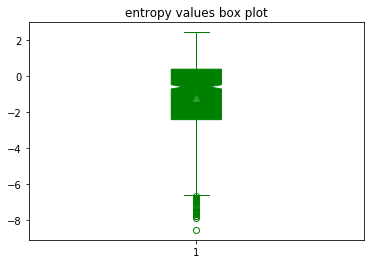

In [13]:
plot6=plot3=plt.boxplot(X[:,[3]],showmeans=True, notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c))
plt.title("entropy values box plot")


### Covariance Matrix

In [14]:
cov=dataset.corr()
cov.style.background_gradient(cmap='CMRmap')

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


### A) Splitting the Train-Test Data in The Ratio 80 : 20

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [16]:
print(X,y,X_train,X_test,y_train,y_test)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]] [0 0 0 ... 1 1 1] [[ 1.2616   4.4303  -1.3335  -1.7517 ]
 [ 0.83292  7.5404   0.65005 -0.92544]
 [ 0.75896  0.29176 -1.6506   0.83834]
 ...
 [-0.89409  3.1991  -1.8219  -2.9452 ]
 [ 3.9166  10.2491  -4.0926  -4.4659 ]
 [ 1.8384   6.063    0.54723  0.51248]] [[-0.24037 -1.7837   2.135    1.2418 ]
 [ 4.1757  10.2615  -3.8552  -4.3056 ]
 [-0.69572  8.6165   1.8419  -4.3289 ]
 ...
 [-3.8952   3.8157  -0.31304 -3.8194 ]
 [-0.96511  9.4111   1.7305  -4.8629 ]
 [ 1.2138   8.7986  -2.1672  -0.74182]] [0 0 1 ... 1 0 0] [1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0
 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0

<b>Feature Scaling</b>

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [17]:
sc=StandardScaler()
X_trainSC=sc.fit_transform(X_train)
X_testSC=sc.fit_transform(X_test)

In [18]:
print(X_trainSC,X_testSC)

[[ 0.29923517  0.42271056 -0.64288649 -0.25300762]
 [ 0.14762489  0.95449546 -0.17929633  0.13603629]
 [ 0.12146763 -0.28492363 -0.71699828  0.96651079]
 ...
 [-0.46316281  0.21219206 -0.75703407 -0.8149662 ]
 [ 1.23822298  1.41764641 -1.28773619 -1.53098667]
 [ 0.50323072  0.7018801  -0.20332716  0.81307985]] [[-0.2578246  -0.60010704  0.18430661  1.17093257]
 [ 1.26675017  1.42840397 -1.16958586 -1.60153896]
 [-0.41502662  1.15137241  0.11806076 -1.6131838 ]
 ...
 [-1.51959391  0.34287809 -0.36899427 -1.35854663]
 [-0.50802904  1.2851896   0.09288236 -1.88006555]
 [ 0.24420343  1.18203955 -0.78806763  0.17956184]]


<b>Implementing Random Forest Classifier</b>

We'll be using 10 decision to build our random forest, and the decision boundary would be based on the principle of measure of entropy.

In [19]:
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
#classifier=RandomForestClassifier(n_estimators=100,criterion='entropy')

classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

In [20]:
print(y_pred)

[1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0
 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0]


In [21]:
print(y_test)

[1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0
 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1
 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0]


### <b><u><font color=F15025>Evaluating the performance of our model on 80:20 Split</font></u></b>

A<u><font color=247BA0> classifier score </font></u>gives a rating to our model, ranging from 0 to 1, the higher the better.

In [22]:
print(classifier.score(X_test,y_test))

0.9927272727272727


A <u><font color=247BA0>confusion matrix</font></u>, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.

In [23]:
cm=confusion_matrix(y_test,y_pred)

In [24]:
print(cm)

[[149   1]
 [  1 124]]


Text(0.5, 1, 'Confusion matrix')

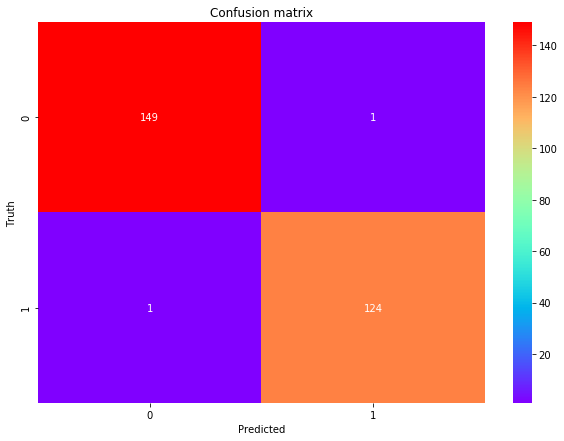

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap='rainbow',fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion matrix")

In [26]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  149
False Positives:  1
False Negatives:  1
True Positives:  124


<u><font color=247BA0>Classification Report</font></u>

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.99      0.99      0.99       125

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



<u><font color=247BA0> Accuracy Score</font></u>

In [28]:
print(accuracy_score(y_test, y_pred)) 

0.9927272727272727


<u><font color=247BA0> Precision </font></u>

In [107]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.7f}".format(Precision))

Precision 0.9888889


<u><font color=247BA0> Recall </font></u>

In [125]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.7f}".format(Recall))

Recall 0.9944134


<u><font color=247BA0> F1 Measure </font></u>

In [108]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.7f}".format(f1))

F1 Score 0.9916435


<u><font color=247BA0> Specificity </font></u>

In [109]:
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.7f}".format(Specificity))

Specificity 0.9914163


<u><font color=247BA0> False Positive Rate </font></u>

In [110]:
#False positive rate
False_positive_rate = fp/(tn+fp)
print("False positive rate {:0.7f}".format(False_positive_rate))

False positive rate 0.0085837


<u><font color=247BA0>False Negative Rate </font></u>

In [222]:
#False negative rate
False_negative_rate = (fn)/(tp+fn)
print("False negative rate {:0.7f}".format(False_negative_rate))

False negative rate 0.0263158


<u><font color=247BA0> Negative Predictive value </font></u>

In [112]:
#Negative predictive value
negative_predictive_value = tn/(tn+fn)
print("Negative predictive value {:0.7f}".format(negative_predictive_value))

Negative predictive value 0.9956897


<u><font color=247BA0>False Discovery Rate</font></u>

In [113]:
#False discovery rate
False_discovery_rate = (fp)/(tp+fp)
print("False discovery rate {:0.7f}".format(False_discovery_rate))

False discovery rate 0.0111111


<u><font color=247BA0> Matthews Correction Coefficient </font></u>

In [114]:
#Matthews’s correlation coefficient
mcc = ((fp*tn)-(fp*fn))/sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print("Matthews’s correlation coefficient {:0.7f}".format(mcc))

Matthews’s correlation coefficient 0.0110223


###  <u><b><font color=F15025>Plotting Decision Tree</font></b></u>

Plotting few decision trees out of 10 used in my random forest classifier.

In [38]:
features = list(dataset.columns[1:])


dot_data = StringIO()  
export_graphviz(classifier.estimators_[0], out_file=dot_data,feature_names=features,filled=True,rounded=True)

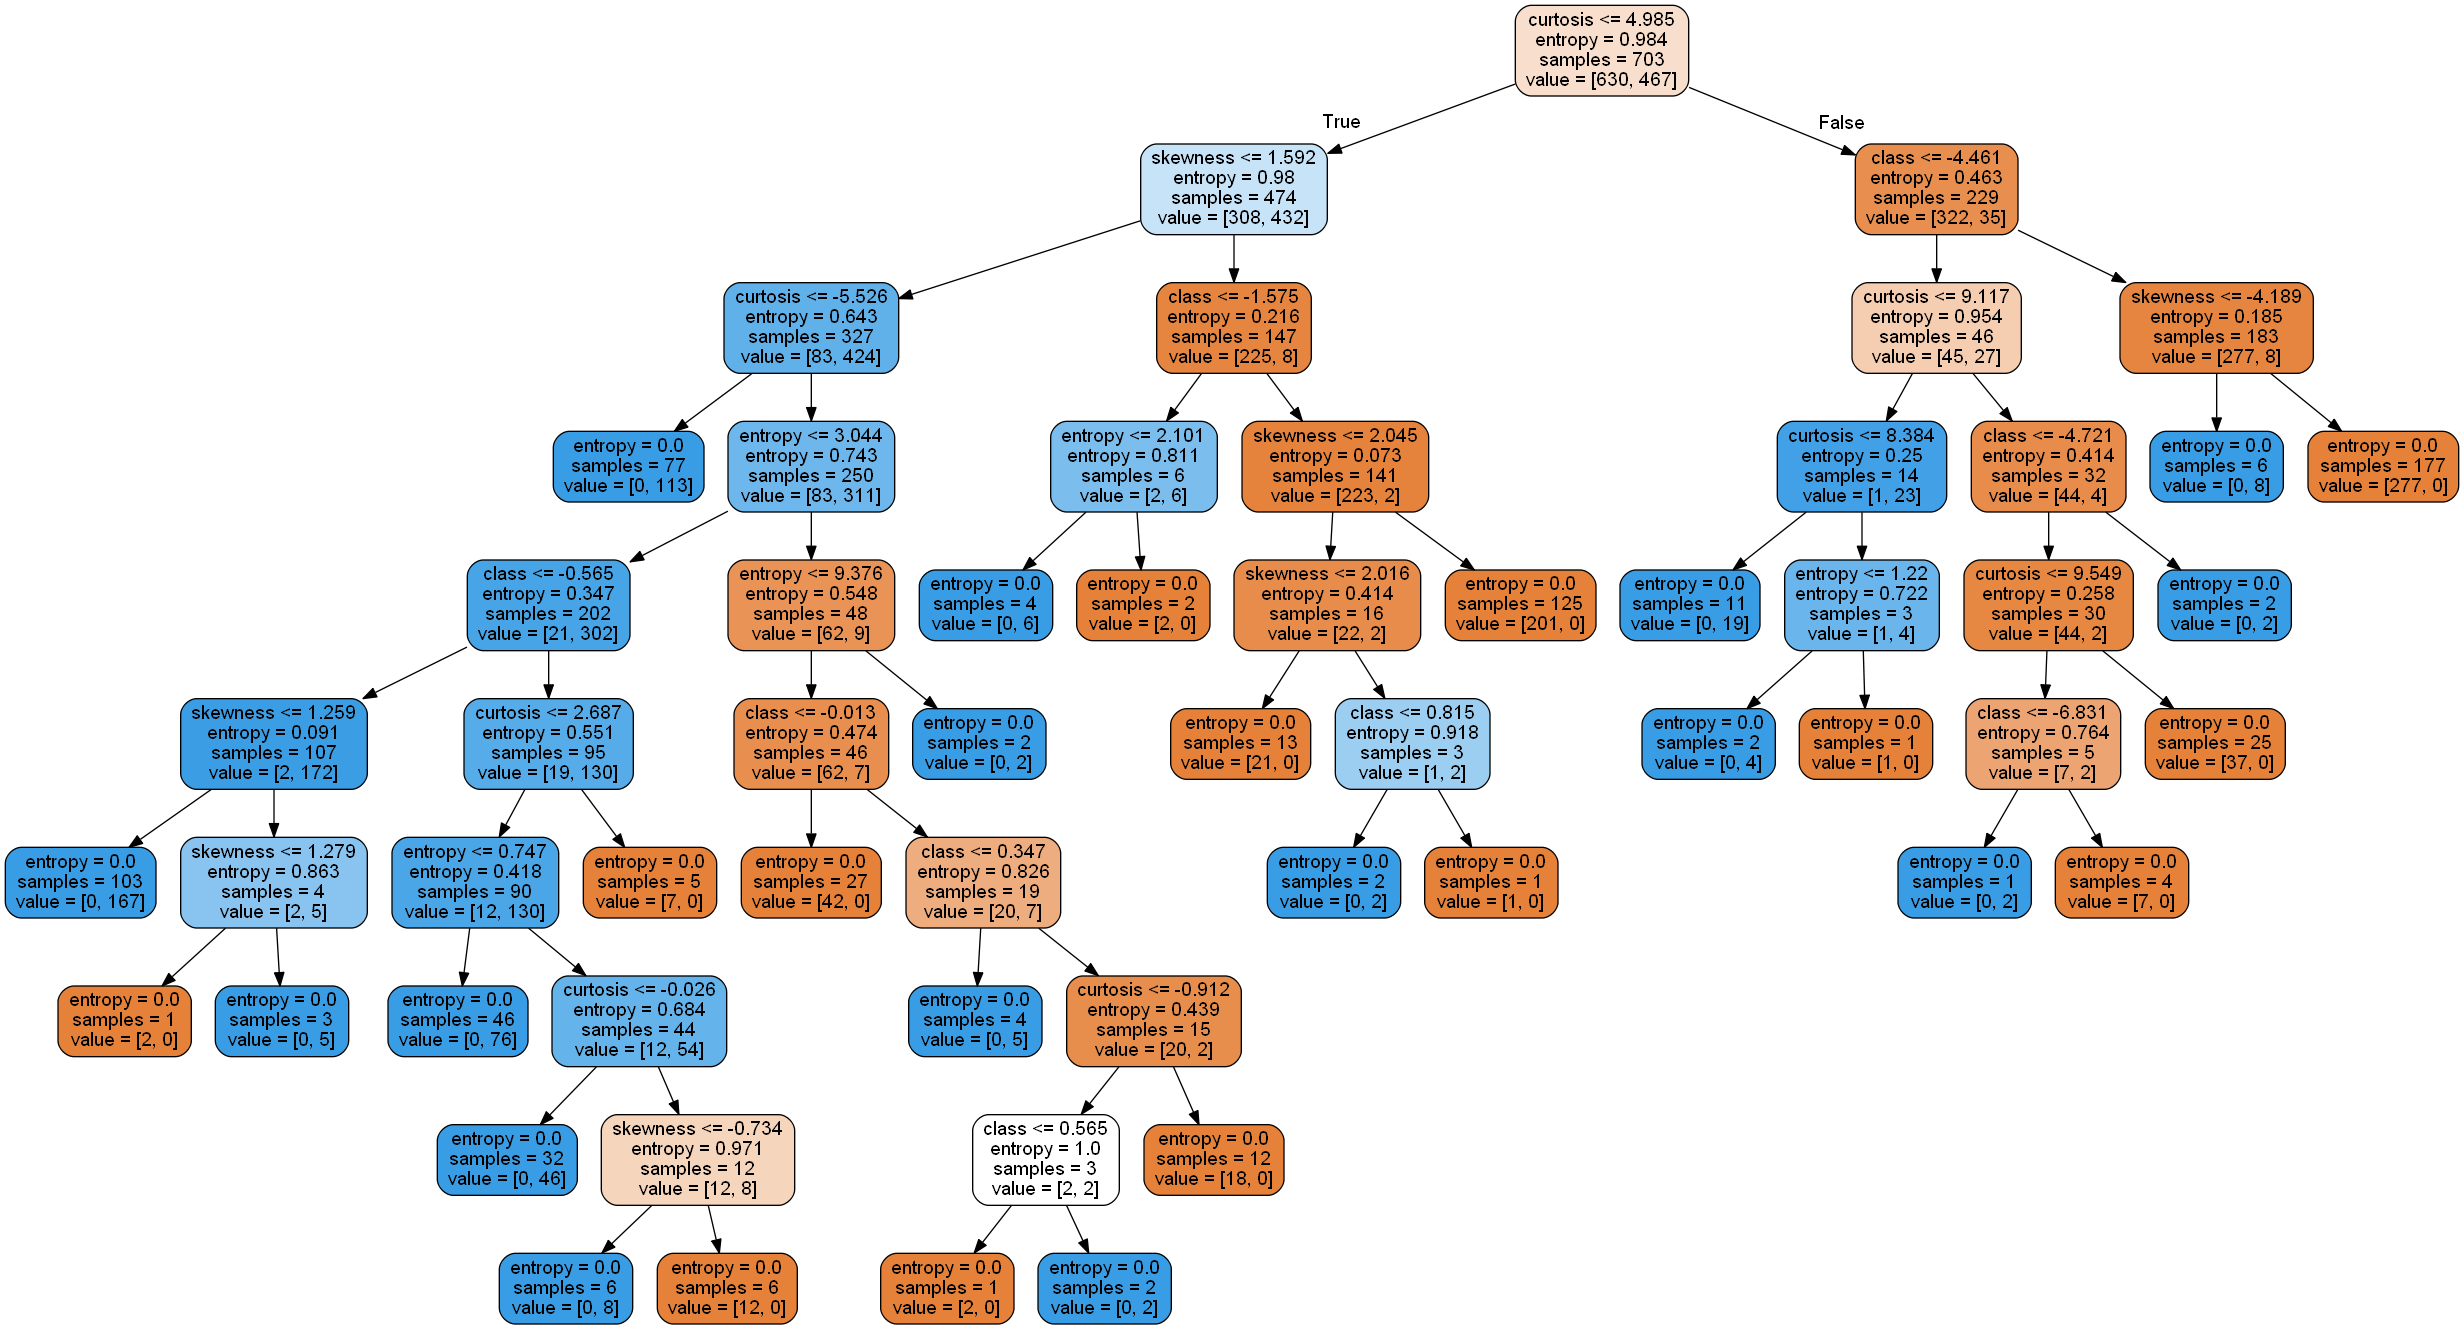

In [39]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())


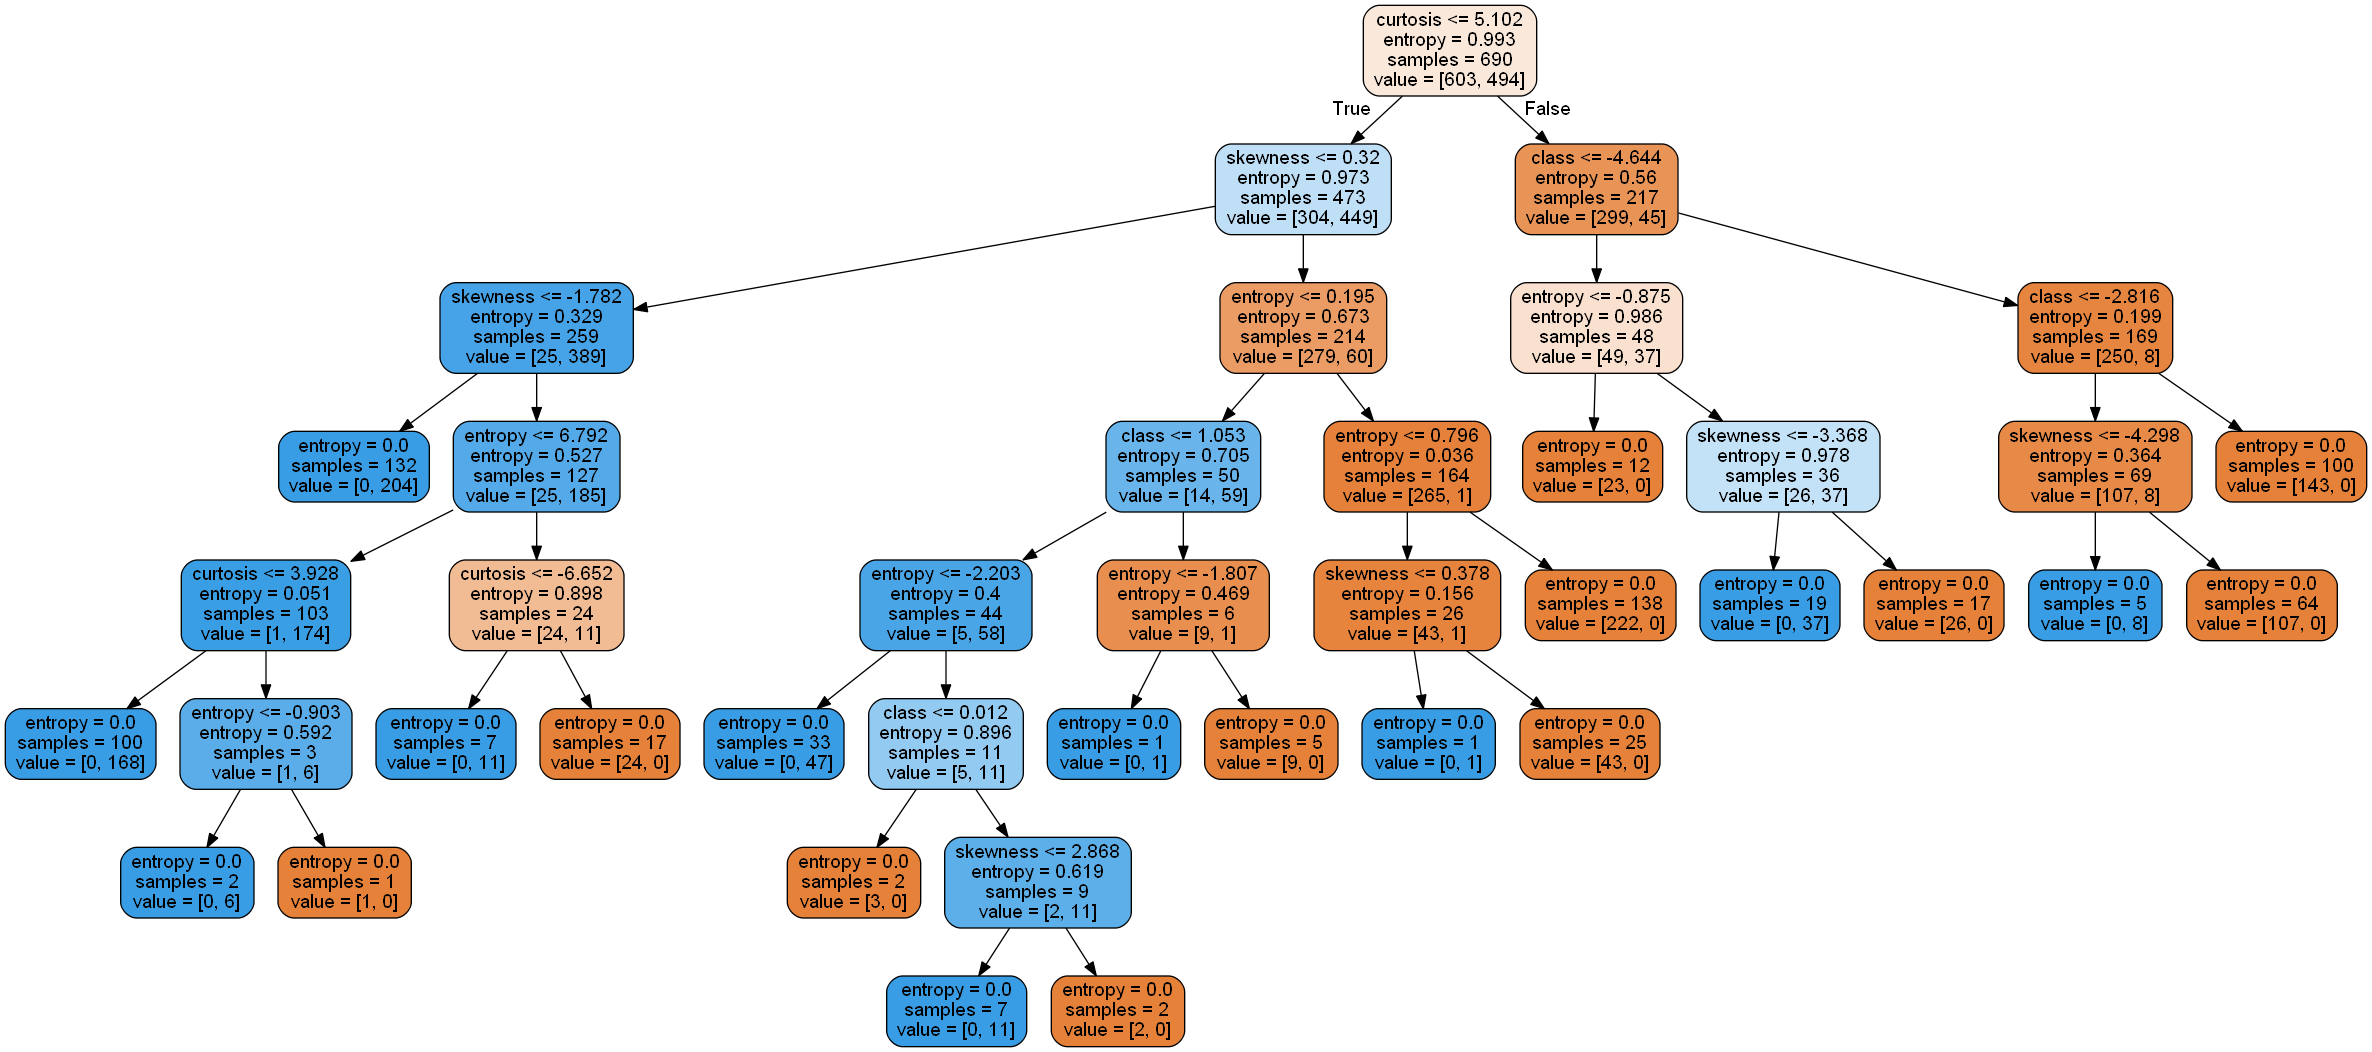

In [40]:
export_graphviz(classifier.estimators_[1], out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[1].create_png())

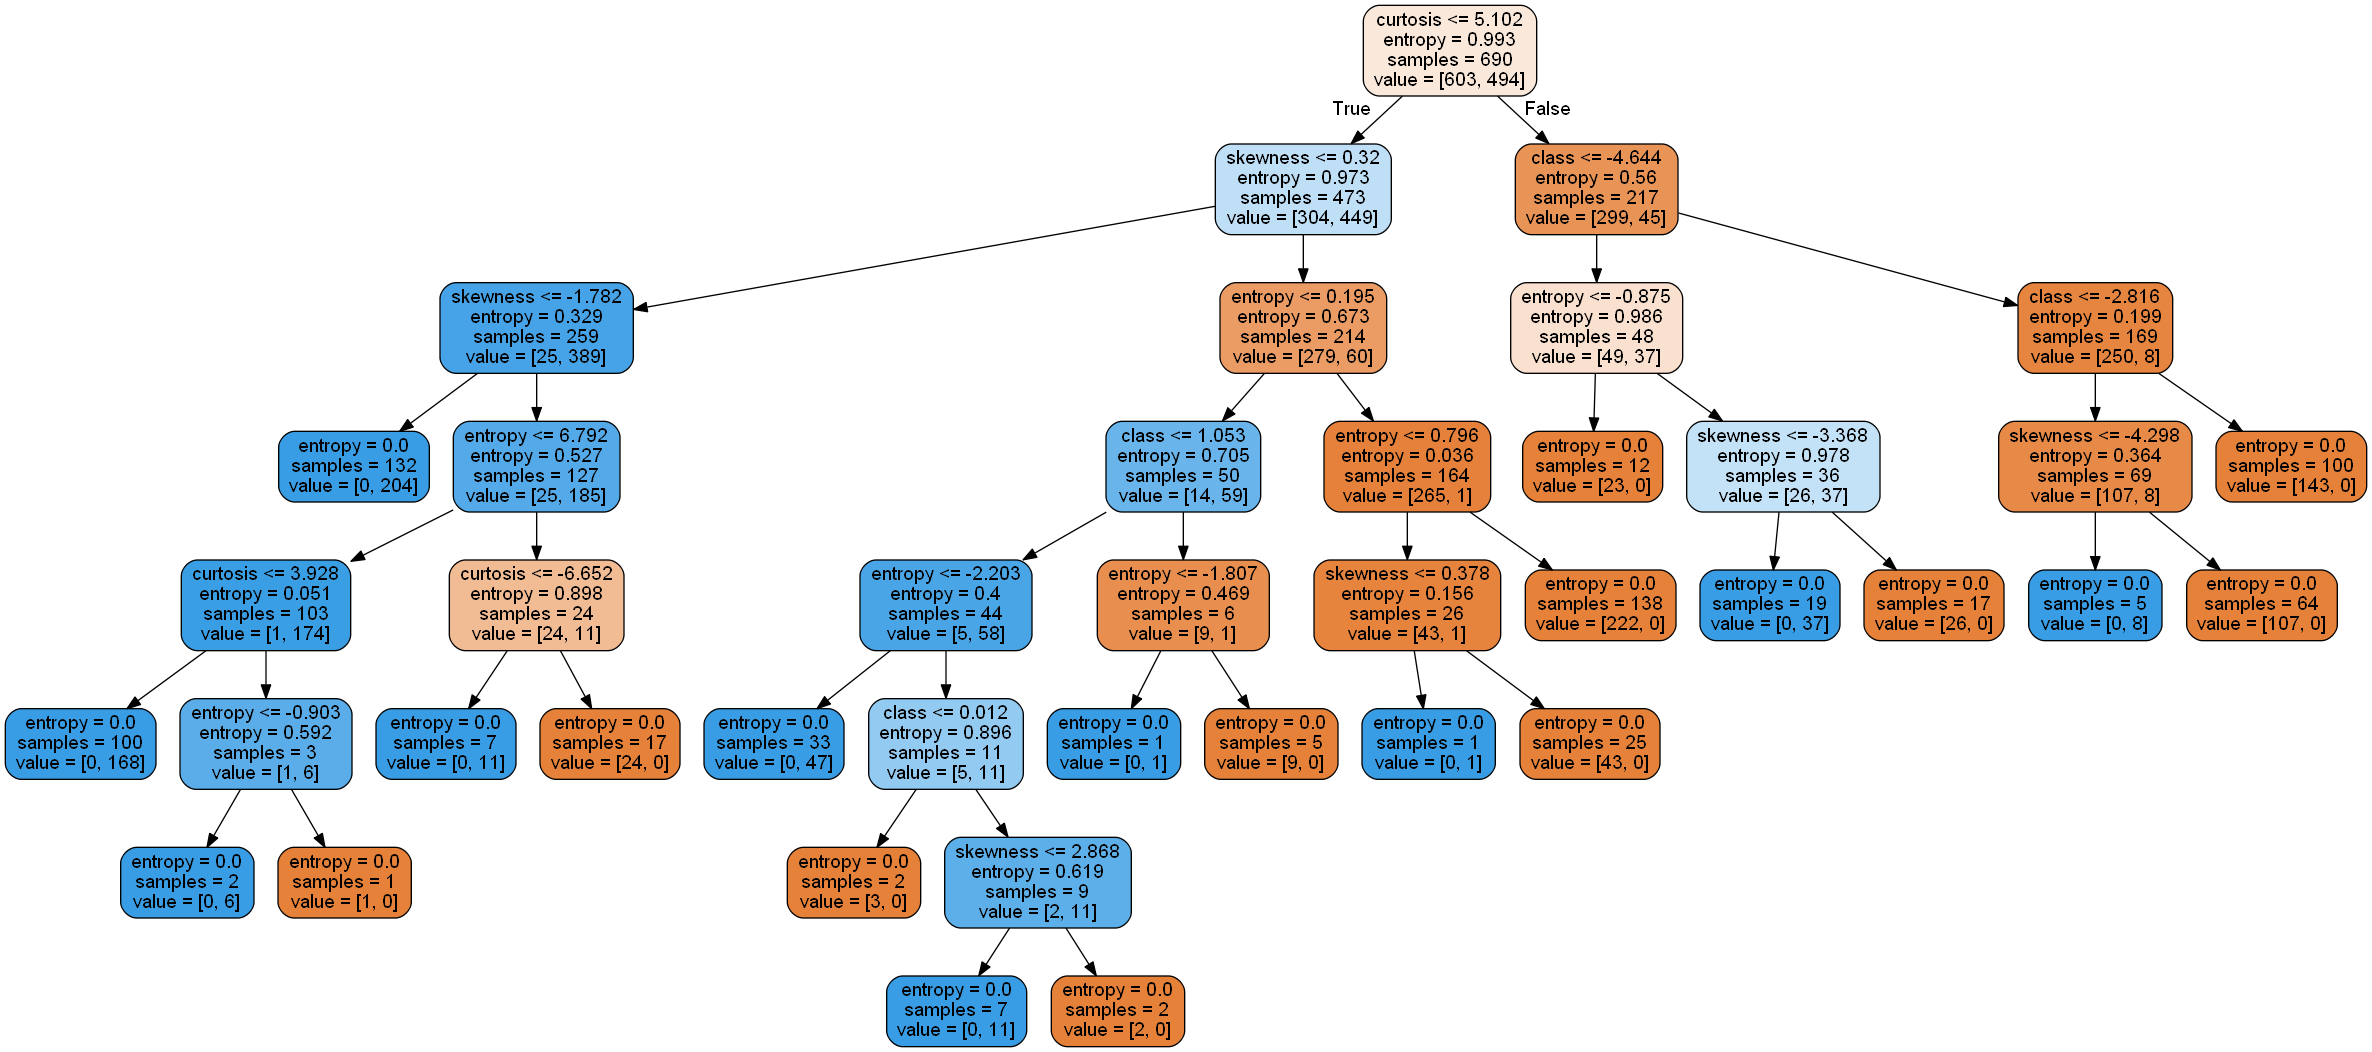

In [41]:
export_graphviz(classifier.estimators_[5], out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[1].create_png())

<b></b>

 <b></b>

##### Plotting the ROC Curve for 80:20 Split

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


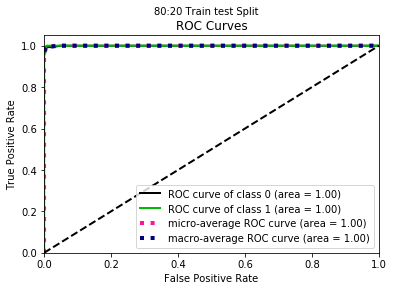

In [42]:
y_pred_proba = classifier.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)

plt.suptitle('80:20 Train test Split',fontsize=10)
plt.show()

#### Learning Curve 80:20 Split

In [43]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

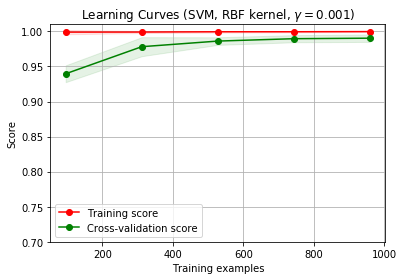

In [46]:
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = RandomForestClassifier(n_estimators=10,criterion='entropy')
plot_learning_curve(estimator, title, feats, labs, (0.7, 1.01), cv=cv, n_jobs=10)

plt.show()

### B) Splitting the Train-Test Data in the Ratio 60:40

In [164]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40)

In [165]:
print(X,y,X_train,X_test,y_train,y_test)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]] [0 0 0 ... 1 1 1] [[-2.799    1.9679  -0.42357 -2.1125 ]
 [-1.8391  -9.0883   9.2416  -0.10432]
 [ 3.7982  10.423   -4.1602  -4.9728 ]
 ...
 [ 2.108    6.7955  -0.1708   0.4905 ]
 [-1.5572  -9.8808   8.1088  -1.0806 ]
 [ 2.2034   5.9947   0.53009  0.84998]] [[-0.278    8.1881  -3.1338  -2.5276 ]
 [ 3.8213   0.23175  2.0133   2.0564 ]
 [-2.2617  -4.7428   6.3489   0.11162]
 ...
 [ 1.3234   3.2964   0.2362  -0.11984]
 [ 0.518    0.25865 -0.84085  0.96118]
 [-0.60975 -4.002    1.8471   0.6017 ]] [1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0
 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0
 0 0 0 0 1 0 

<b>Feature Scaling</b>

In [166]:
sc=StandardScaler()
X_trainSC=sc.fit_transform(X_train)
X_testSC=sc.fit_transform(X_test)

In [167]:
print(X_trainSC,X_testSC)

[[-1.1251395   0.03087536 -0.44057743 -0.45456662]
 [-0.7877829  -1.83787132  1.73573011  0.50884358]
 [ 1.19344468  1.4599776  -1.28195487 -1.82677538]
 ...
 [ 0.59942434  0.84684844 -0.38366117  0.79420428]
 [-0.68870922 -1.97182166  1.48065739  0.04048013]
 [ 0.63295265  0.71149521 -0.22584169  0.96666228]] [[-0.26755071  1.04740956 -1.05745    -0.61041046]
 [ 1.17809059 -0.32772246  0.20001764  1.54871525]
 [-0.96711371 -1.18749649  1.25923094  0.63269769]
 ...
 [ 0.29719205  0.20195488 -0.23413863  0.52367691]
 [ 0.01316319 -0.32307322 -0.49726846  1.03285188]
 [-0.38454422 -1.05946066  0.15941398  0.86353196]]


In [168]:
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
#classifier=RandomForestClassifier(n_estimators=100,criterion='entropy')

classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

In [169]:
print(y_pred)

[0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0
 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1
 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1
 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 1 1 1 1 0 0 1 0 0 0 

In [170]:
print(y_test)

[0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0
 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1
 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1
 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 1 1 1 1 0 0 1 0 0 0 

In [171]:
print(classifier.score(X_test,y_test))

0.994535519125683


In [172]:
cm=confusion_matrix(y_test,y_pred)

In [173]:
print(cm)

[[308   3]
 [  0 238]]


Text(0.5, 1, 'Confusion matrix')

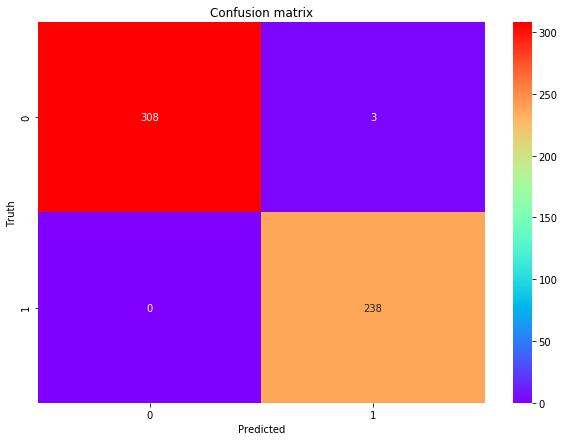

In [174]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap='rainbow',fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion matrix")

In [175]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  308
False Positives:  3
False Negatives:  0
True Positives:  238


In [176]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       311
           1       0.99      1.00      0.99       238

    accuracy                           0.99       549
   macro avg       0.99      1.00      0.99       549
weighted avg       0.99      0.99      0.99       549



In [177]:
print(accuracy_score(y_test, y_pred)) 

0.994535519125683


In [178]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.7f}".format(Precision))

Precision 0.9875519


In [179]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.7f}".format(Recall))

Recall 1.0000000


In [180]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.7f}".format(f1))

F1 Score 0.9937370


In [181]:
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.7f}".format(Specificity))

Specificity 0.9903537


In [188]:
#False positive rate
False_positive_rate = fp/(tn+fp)
print("False positive rate {:0.7f}".format(False_positive_rate))

False positive rate 0.0096463


In [190]:
#False negative rate
False_negative_rate = (fn)/(tp+fn)
print("False negative rate {:0.7f}".format(False_negative_rate))

False negative rate 0.0000000


In [184]:
#Negative predictive value
negative_predictive_value = tn/(tn+fn)
print("Negative predictive value {:0.7f}".format(negative_predictive_value))

Negative predictive value 1.0000000


In [185]:
#False discovery rate
False_discovery_rate = (fp)/(tp+fp)
print("False discovery rate {:0.7f}".format(False_discovery_rate))

False discovery rate 0.0124481


In [186]:
#Matthews’s correlation coefficient
mcc = ((fp*tn)-(fp*fn))/sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print("Matthews’s correlation coefficient {:0.7f}".format(mcc))

Matthews’s correlation coefficient 0.0124658


In [70]:
features = list(dataset.columns[1:])


dot_data = StringIO()  
export_graphviz(classifier.estimators_[0], out_file=dot_data,feature_names=features,filled=True,rounded=True)

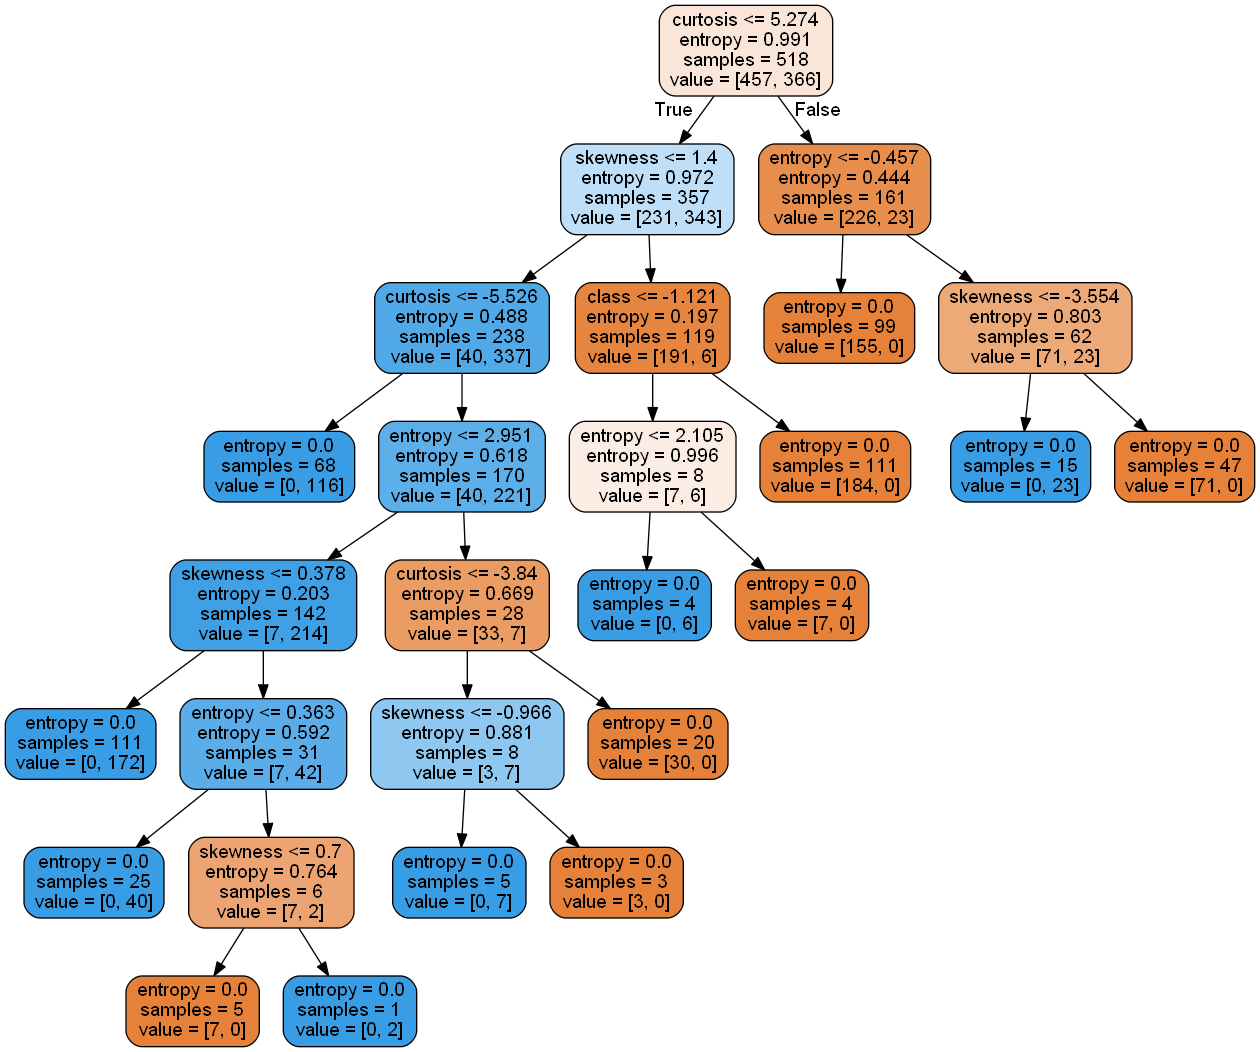

In [71]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())


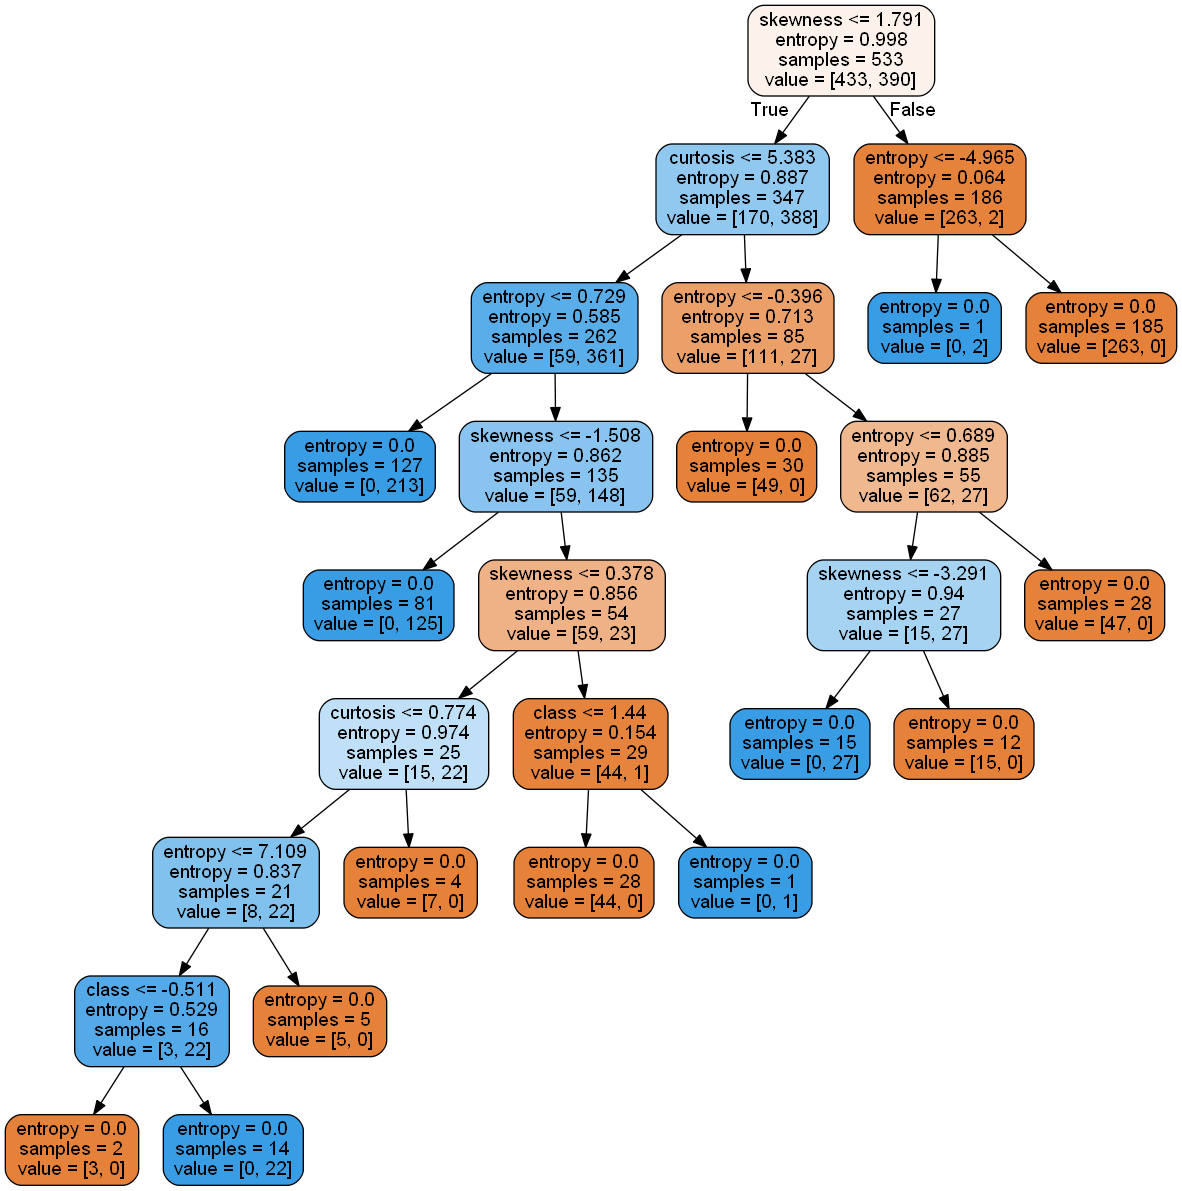

In [72]:
export_graphviz(classifier.estimators_[1], out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[1].create_png())

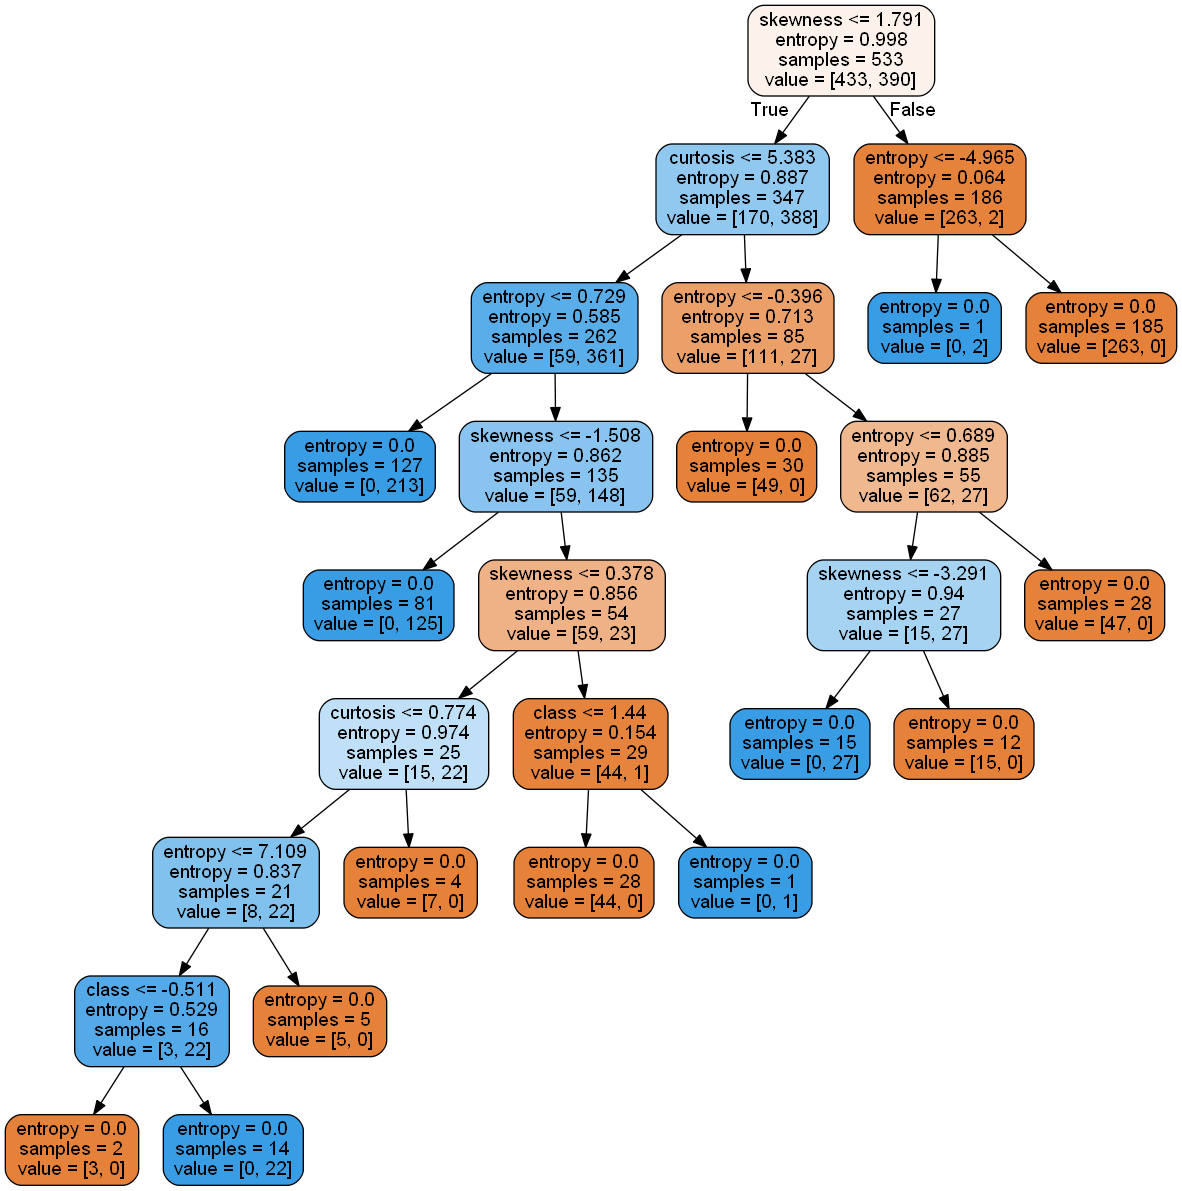

In [73]:
export_graphviz(classifier.estimators_[5], out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[1].create_png())

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


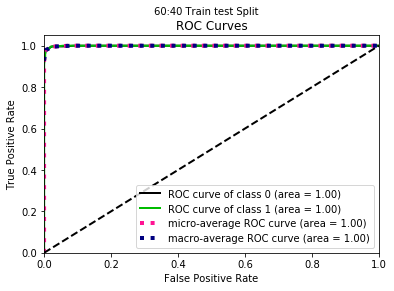

In [74]:
y_pred_proba = classifier.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)

plt.suptitle('60:40 Train test Split',fontsize=10)
plt.show()

#### Learnign Curve for 60:40 Split

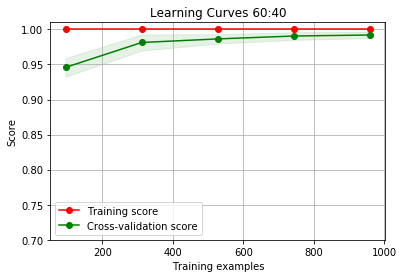

In [191]:
title = "Learning Curves 60:40"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = RandomForestClassifier(n_estimators=100,criterion='entropy')
plot_learning_curve(estimator, title, feats, labs, (0.7, 1.01), cv=cv, n_jobs=60)

plt.show()

### C) Splitting the Data in 70:30 Ratio

In [194]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [195]:
print(X,y,X_train,X_test,y_train,y_test)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]] [0 0 0 ... 1 1 1] [[-5.119     6.6486   -0.049987 -6.5206  ]
 [ 5.0452    3.8964   -1.4304    0.86291 ]
 [ 1.8533    6.1458    1.0176   -2.0401  ]
 ...
 [ 4.2478    7.6956   -2.7696   -1.0767  ]
 [-5.0676   -5.1877   10.4266   -0.86725 ]
 [ 1.3518    1.0595   -2.3437    0.39998 ]] [[ 4.5645  -3.6275   2.8684   0.27714]
 [ 3.7758   7.1783  -1.5195   0.40128]
 [ 4.0948  -2.9674   2.3689   0.75429]
 ...
 [-0.78289 11.3603  -0.37644 -7.0495 ]
 [-0.17296 -1.1816   1.3818   0.7336 ]
 [ 0.24394  1.4733  -1.4192  -0.58535]] [1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1

In [196]:
sc=StandardScaler()
X_trainSC=sc.fit_transform(X_train)
X_testSC=sc.fit_transform(X_test)

In [197]:
print(X_trainSC,X_testSC)

[[-1.99314037  0.78321253 -0.30902844 -2.50223292]
 [ 1.60529027  0.31701114 -0.62710755  0.96906939]
 [ 0.47526225  0.6980421  -0.06303169 -0.39575917]
 ...
 [ 1.32298683  0.96056623 -0.93569023  0.05717617]
 [-1.97494324 -1.22176511  2.10501971  0.15564753]
 [ 0.29771626 -0.16353777 -0.83755301  0.75142629]] [[ 1.50025382 -0.91981694  0.28945457  0.71364288]
 [ 1.22574861  0.95171292 -0.74933983  0.77460254]
 [ 1.33677582 -0.80548974  0.1712026   0.94795015]
 ...
 [-0.36089284  1.67602189 -0.47873104 -2.88414613]
 [-0.14860812 -0.49619491 -0.06248412  0.9377902 ]
 [-0.00350704 -0.03637476 -0.72559474  0.29011217]]


In [198]:
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
#classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')

classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

In [199]:
print(y_pred)

[0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1
 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0
 1 0 0 1 1]


In [200]:
print(y_test)

[0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1
 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0
 1 0 0 1 1]


In [201]:
print(classifier.score(X_test,y_test))

0.9781553398058253


In [202]:
cm=confusion_matrix(y_test,y_pred)

In [203]:
print(cm)

[[218   4]
 [  5 185]]


Text(0.5, 1, 'Confusion matrix')

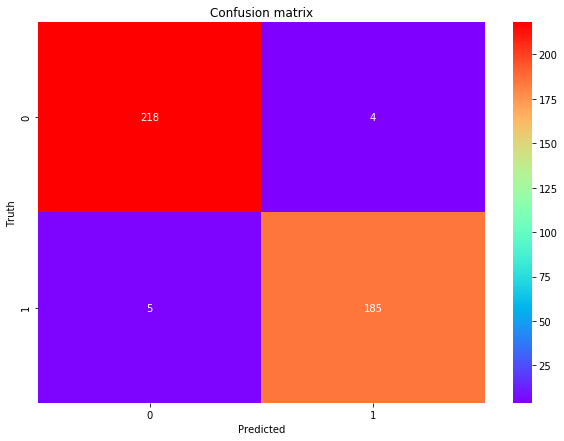

In [224]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,cmap='rainbow',fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion matrix")

In [205]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  218
False Positives:  4
False Negatives:  5
True Positives:  185


In [206]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       222
           1       0.98      0.97      0.98       190

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [207]:
print(accuracy_score(y_test, y_pred)) 

0.9781553398058253


In [209]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.7f}".format(Precision))

Precision 0.9788360


In [210]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.7f}".format(Recall))

Recall 0.9736842


In [211]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.7f}".format(f1))

F1 Score 0.9762533


In [212]:
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.7f}".format(Specificity))

Specificity 0.9819820


In [213]:
#False positive rate
False_positive_rate = fp/(tn+fp)
print("False positive rate {:0.7f}".format(False_positive_rate))

False positive rate 0.0180180


In [219]:
#False negative rate
False_negative_rate = (fn)/(tp+fn)
print("False negative rate {:0.7f}".format(False_negative_rate))

False negative rate 0.0263158


In [215]:
#Negative predictive value
negative_predictive_value = tn/(tn+fn)
print("Negative predictive value {:0.7f}".format(negative_predictive_value))

Negative predictive value 0.9775785


In [216]:
#False discovery rate
False_discovery_rate = (fp)/(tp+fp)
print("False discovery rate {:0.7f}".format(False_discovery_rate))

False discovery rate 0.0211640


In [217]:
#Matthews’s correlation coefficient
mcc = ((fp*tn)-(fp*fn))/sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print("Matthews’s correlation coefficient {:0.7f}".format(mcc))

Matthews’s correlation coefficient 0.0202071


In [100]:
features = list(dataset.columns[1:])


dot_data = StringIO()  
export_graphviz(classifier.estimators_[0], out_file=dot_data,feature_names=features,filled=True,rounded=True)

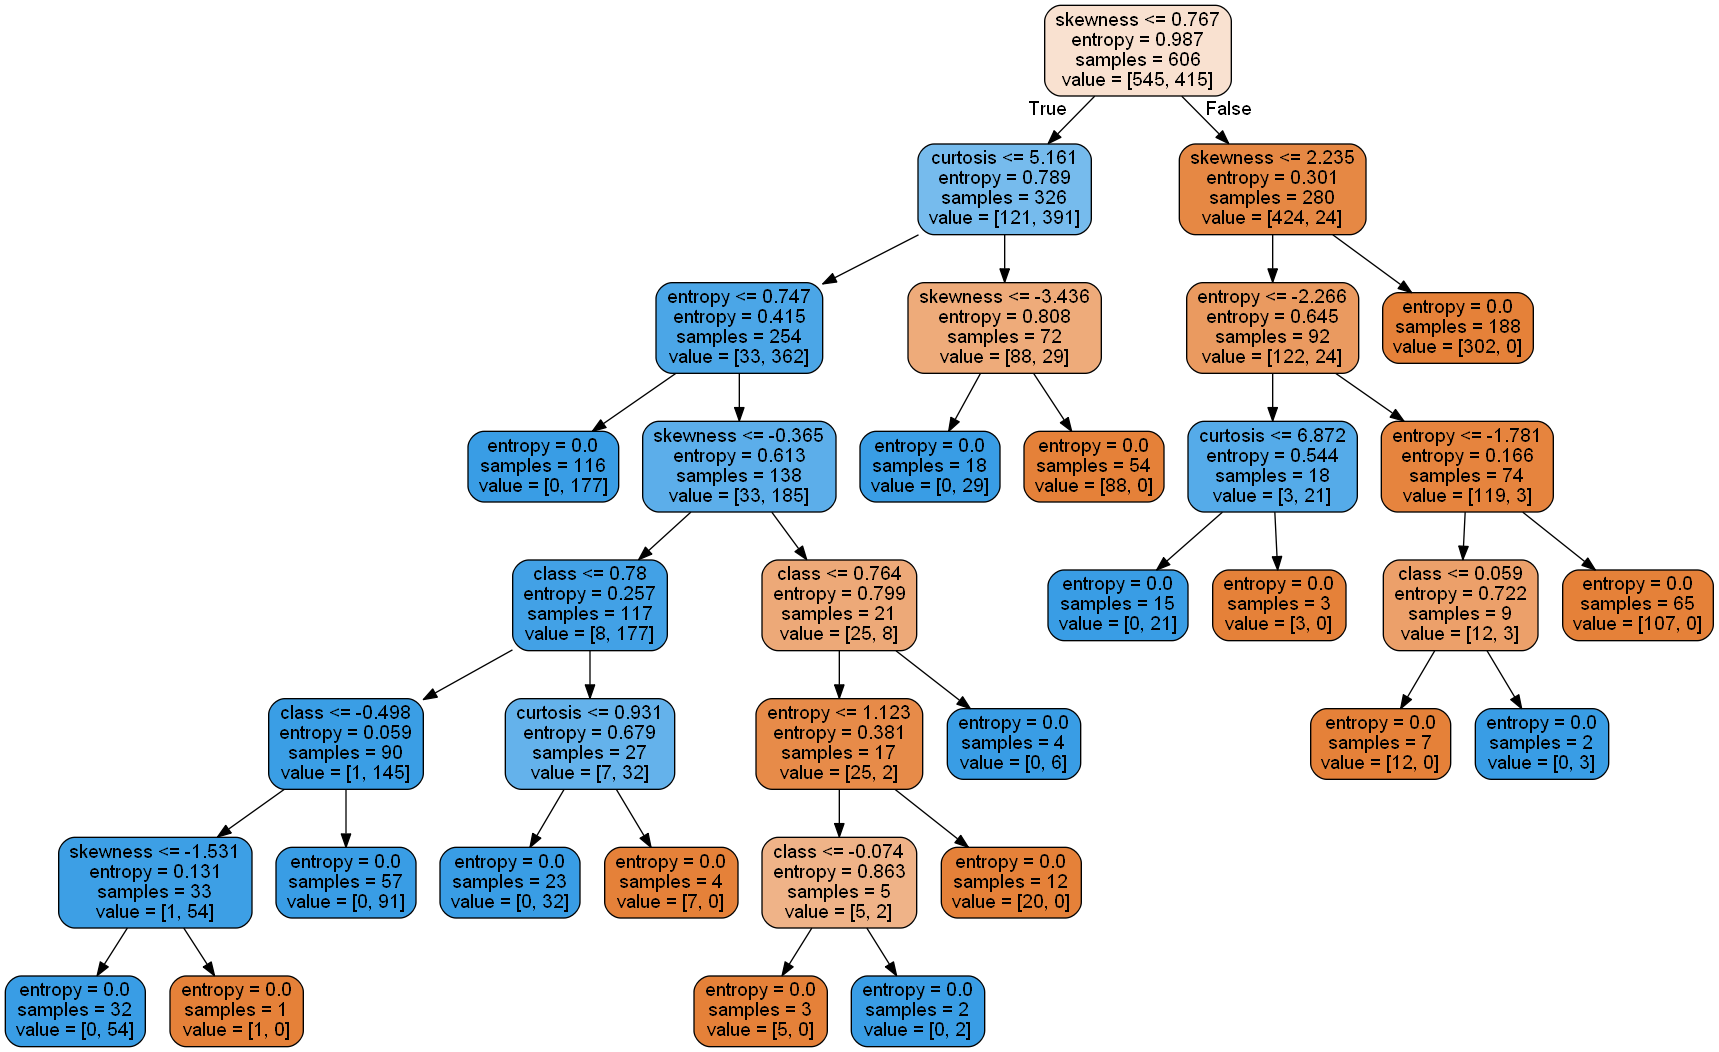

In [101]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())


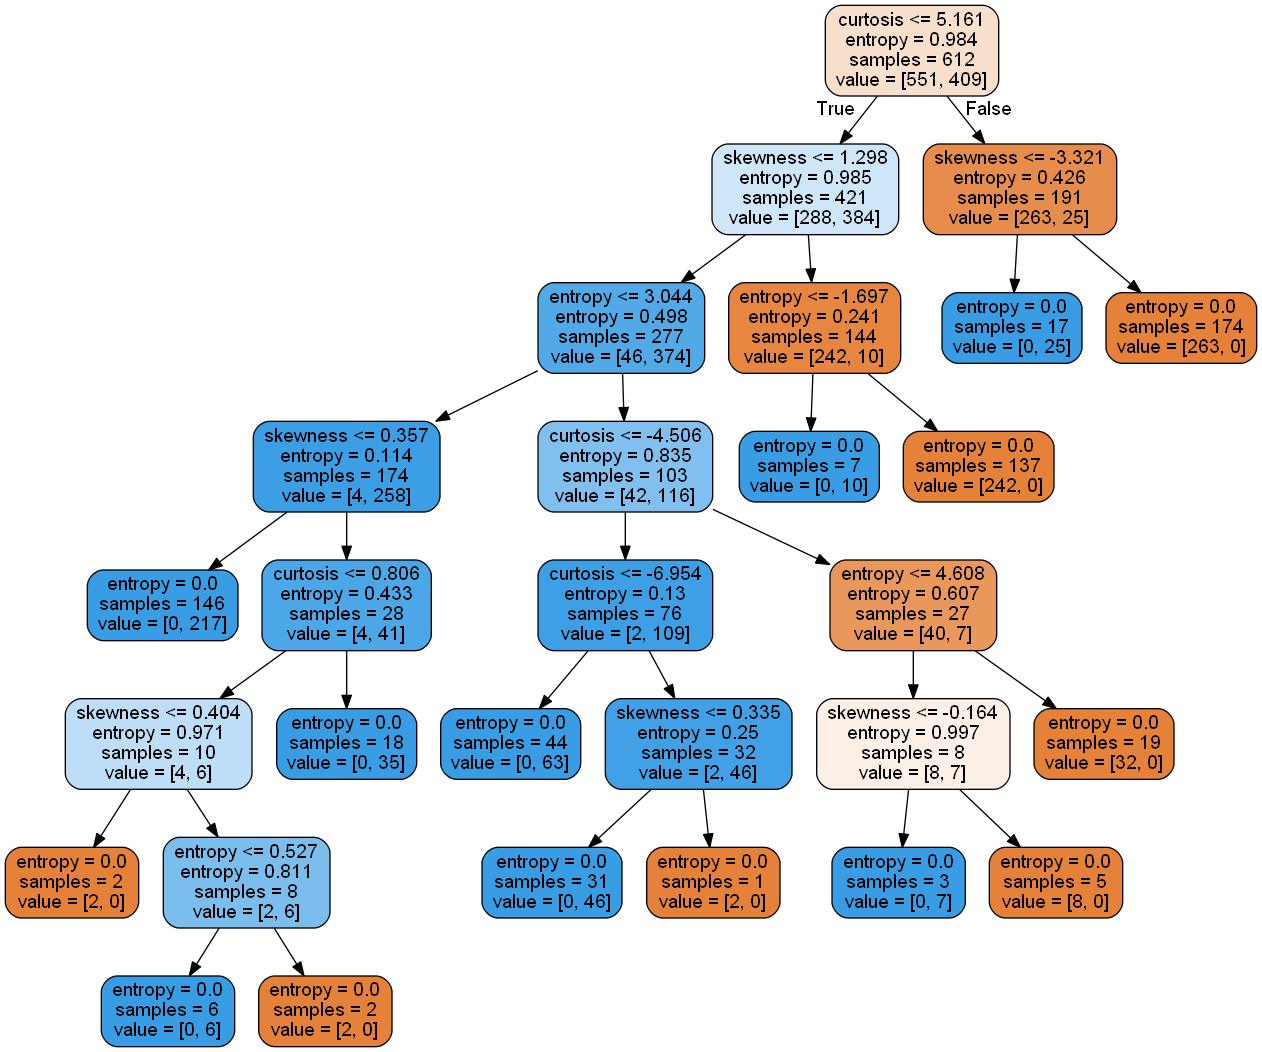

In [102]:
export_graphviz(classifier.estimators_[1], out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[1].create_png())

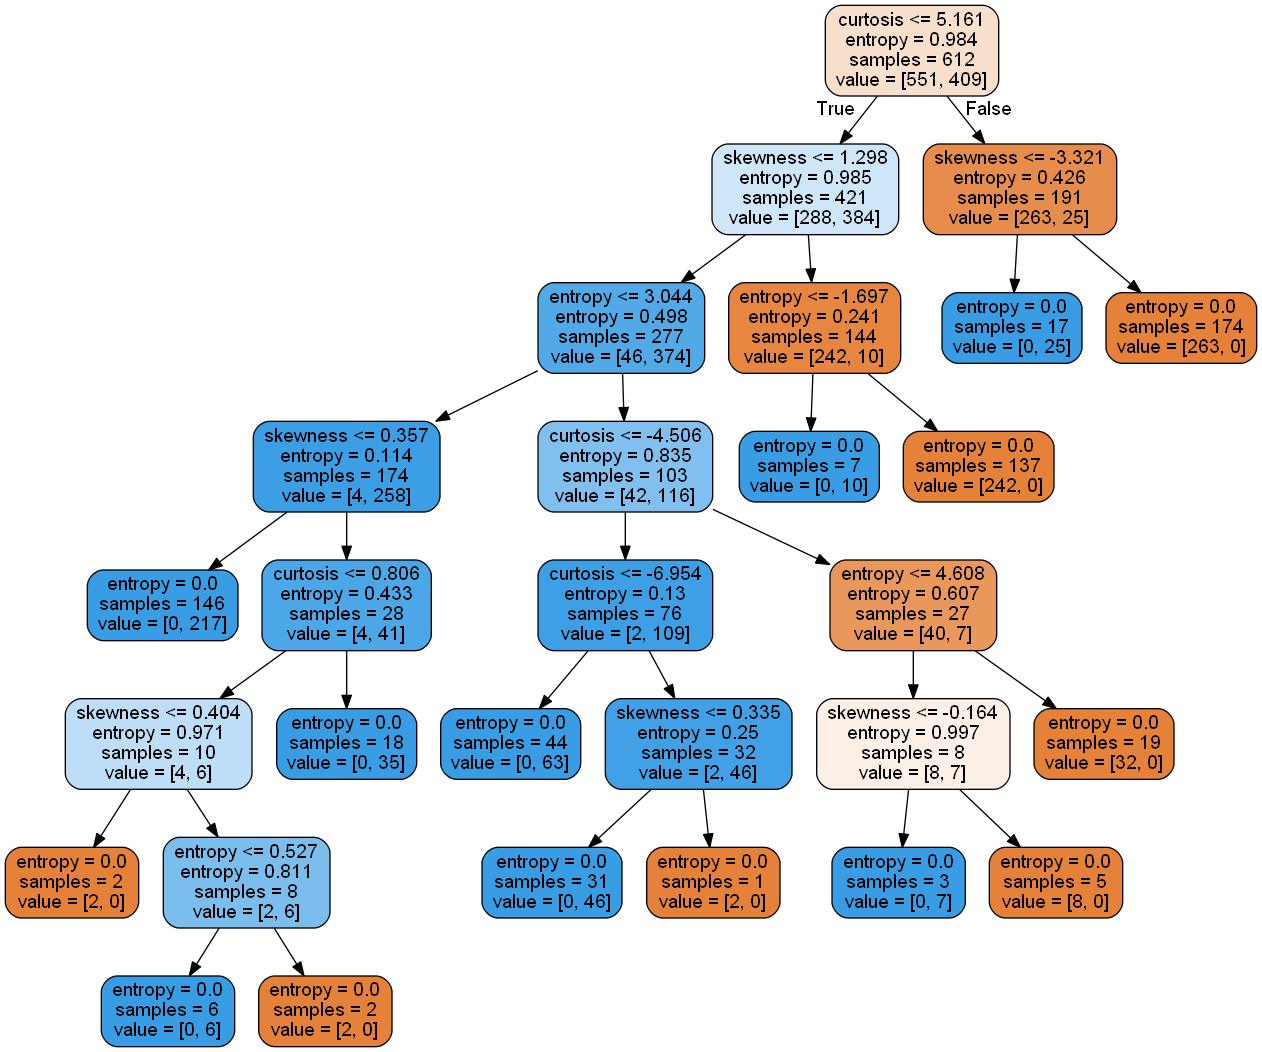

In [103]:
export_graphviz(classifier.estimators_[5], out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[1].create_png())

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


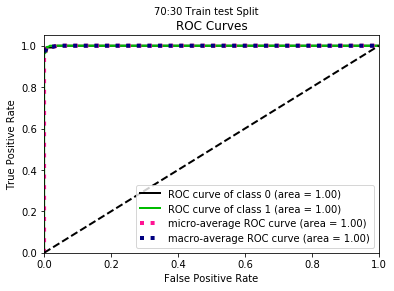

In [104]:
y_pred_proba = classifier.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)

plt.suptitle('70:30 Train test Split',fontsize=10)
plt.show()

#### Learning Curve

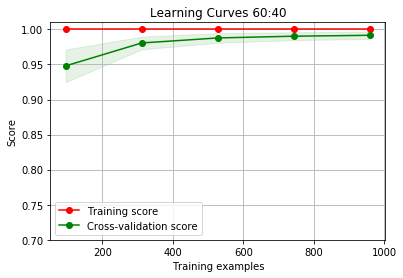

In [105]:
title = "Learning Curves 60:40"
cv = ShuffleSplit(n_splits=200, test_size=0.3, random_state=0)
estimator = RandomForestClassifier(n_estimators=100,criterion='entropy')
plot_learning_curve(estimator, title, feats, labs, (0.7, 1.01), cv=cv, n_jobs=60)

plt.show()

## Conclusion of Results In Graphical Format For All Three Train Test Splits

![](FinalGraph.png)

![](Graphs_1.png)

![](Graphs_2.png)

![](Graph_3.png)